In [1]:
import json
train_toy_path = '/data4/xiongchenxu/tango/tango/train_strong.json'  # 将此处替换为你的JSON文件路径
val_toy_path = '/data4/xiongchenxu/tango/tango/val_strong.json'  # 将此处替换为你的JSON文件路径
test_toy_path = '/data4/xiongchenxu/tango/tango/test_strong.json'  # 将此处替换为你的JSON文件路径

def modify_json(file_path, new_prefix):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    modified_lines = []
    for line in lines:
        data = json.loads(line)
        file_name = data['location'].split('/')[-1]
        data['location'] = new_prefix + "Y"+file_name
        modified_lines.append(json.dumps(data, ensure_ascii=False))

    with open(file_path, 'w', encoding='utf-8') as file:
        for line in modified_lines:
            file.write(line + '\n')

new_prefix = '/data4/xiongchenxu/dataset/AudioSetStrong/mnt/fast/nobackup/scratch4weeks/xm00178/WavCaps/data/waveforms/AudioSet_SL_flac/'  # 将此处替换为你想要的新前缀

modify_json(train_toy_path , new_prefix)
modify_json(val_toy_path  , new_prefix)
modify_json(test_toy_path , new_prefix)

In [10]:
new_prefix = '/data4/xiongchenxu/dataset/AudioSetStrong/mnt/fast/nobackup/scratch4weeks/xm00178/WavCaps/data/waveforms/AudioSet_SL_flac/'  # 将此处替换为你想要的新前缀
with open('/data4/xiongchenxu/tango/tango/data/valid_v2.json', 'r', encoding='utf-8') as file:
        lines = file.readlines()
modified_lines = []
for line in lines:
    data = json.loads(line)
    file_name = data['location'].split('/')[-1]
    file_name = file_name.replace('.wav', '.flac')
    data['location'] = new_prefix + file_name
    modified_lines.append(json.dumps(data, ensure_ascii=False))

with open('/data4/xiongchenxu/tango/tango/data/valid_v2.json', 'w', encoding='utf-8') as file:
    for line in modified_lines:
        file.write(line + '\n')

In [2]:
import json

train_file_path = '/data4/xiongchenxu/dataset/AudioSetStrong/train_audiocaps.json'  # 将此处替换为你的JSON文件路径
val_file_path = '/data4/xiongchenxu/dataset/AudioSetStrong/valid_audiocaps.json'  # 将此处替换为你的JSON文件路径
test_file_path = '/data4/xiongchenxu/dataset/AudioSetStrong/test_audiocaps_subset.json'  # 将此处替换为你的JSON文件路径

# 读取并解析每行JSON对象
train_data = []
with open(train_file_path, 'r') as file:
    for line in file:
        train_data.append(json.loads(line))

val_data = []
with open(val_file_path, 'r') as file:
    for line in file:
        val_data.append(json.loads(line))

test_data = []
with open(test_file_path, 'r') as file:
    for line in file:
        test_data.append(json.loads(line))

# Toyset

In [16]:
train_simp = []
for data in train_data:
    num = len(data['data_numpy'][1])
    if len(data['data_numpy'][0]) == 1:
        train_simp.append(data)
    else:
        for i in range(num - 1):
            end_time = float(data['data_numpy'][2][i])
            start_time = float(data['data_numpy'][1][i + 1])
            if end_time >= start_time:
                break
        else:
            train_simp.append(data)

val_simp = []
for data in val_data:
    num = len(data['data_numpy'][1])
    if len(data['data_numpy'][0]) == 1:
        val_simp.append(data)
    else:
        for i in range(num - 1):
            end_time = float(data['data_numpy'][2][i])
            start_time = float(data['data_numpy'][1][i + 1])
            if end_time >= start_time:
                break
        else:
            val_simp.append(data)

test_simp = []
for data in test_data:
    num = len(data['data_numpy'][1])
    if len(data['data_numpy'][0]) == 1:
        test_simp.append(data)
    else:
        for i in range(num - 1):
            end_time = float(data['data_numpy'][2][i])
            start_time = float(data['data_numpy'][1][i + 1])
            if end_time >= start_time:
                break
        else:
            test_simp.append(data)

In [3]:
train_simp = train_data
val_simp = val_data
test_simp = test_data

In [4]:
print(len(train_simp),len(val_simp),len(test_simp))

89557 1398 15866


# make toy set

In [1]:
import json

train_file_path = '/data4/xiongchenxu/tango/tango/train_audiocaps.json'  # 将此处替换为你的JSON文件路径
val_file_path = '/data4/xiongchenxu/tango/tango/valid_audiocaps.json'  # 将此处替换为你的JSON文件路径
test_file_path = '/data4/xiongchenxu/tango/tango/test_audiocaps_subset.json'  # 将此处替换为你的JSON文件路径

# 读取并解析每行JSON对象
train_data = []
with open(train_file_path, 'r') as file:
    for line in file:
        train_data.append(json.loads(line))

val_data = []
with open(val_file_path, 'r') as file:
    for line in file:
        val_data.append(json.loads(line))

test_data = []
with open(test_file_path, 'r') as file:
    for line in file:
        test_data.append(json.loads(line))

In [2]:
train_data_numpy = [data['data_numpy'] for data in train_data]
val_data_numpy = [data['data_numpy'] for data in val_data]
test_data_numpy = [data['data_numpy'] for data in test_data]

In [4]:
def propocess(data_numpy):
    event = [data[0] for data in data_numpy]
    start_time = [data[1] for data in data_numpy]
    end_time = [data[2] for data in data_numpy]

    # 将 start_time 和 end_time 列表中的字符串转换为浮点数
    for j in range(len(start_time)):
        s_time = start_time[j]
        e_time = end_time[j]
        for i in range(len(s_time)):
            s_time[i] = float(s_time[i])
            e_time[i] = float(e_time[i])

    compress = []
    for data in data_numpy:
        ziplist = list(zip(data[0], data[1], data[2]))
        sorted_ziplist = sorted(ziplist, key=lambda x: x[1])  # 按照起始时间排序
        compress.append(sorted_ziplist)
    return compress

def decompress(compress):
    decompressed = []
    for ziplist in compress:
        events, start_times, end_times = zip(*ziplist)
        decompressed.append([list(events), list(start_times), list(end_times)])
    return decompressed

for data_item in train_data:
    data_numpy = data_item['data_numpy']
    compressed_data = propocess([data_numpy])
    decompressed_data = decompress(compressed_data)
    data_item['data_numpy'] = decompressed_data[0]

for data_item in test_data:
    data_numpy = data_item['data_numpy']
    compressed_data = propocess([data_numpy])
    decompressed_data = decompress(compressed_data)
    data_item['data_numpy'] = decompressed_data[0]

for data_item in val_data:
    data_numpy = data_item['data_numpy']
    compressed_data = propocess([data_numpy])
    decompressed_data = decompress(compressed_data)
    data_item['data_numpy'] = decompressed_data[0]


In [26]:
train_simp = []
for data in train_data:
    num = len(data['data_numpy'][1])
    if len(data['data_numpy'][0]) == 1:
        train_simp.append(data)
    else:
        for i in range(num - 1):
            end_time = float(data['data_numpy'][2][i])
            start_time = float(data['data_numpy'][1][i + 1])
            if end_time >= start_time:
                break
        else:
            train_simp.append(data)

val_simp = []
for data in val_data:
    num = len(data['data_numpy'][1])
    if len(data['data_numpy'][0]) == 1:
        val_simp.append(data)
    else:
        for i in range(num - 1):
            end_time = float(data['data_numpy'][2][i])
            start_time = float(data['data_numpy'][1][i + 1])
            if end_time >= start_time:
                break
        else:
            val_simp.append(data)

test_simp = []
for data in test_data:
    num = len(data['data_numpy'][1])
    if len(data['data_numpy'][0]) == 1:
        test_simp.append(data)
    else:
        for i in range(num - 1):
            end_time = float(data['data_numpy'][2][i])
            start_time = float(data['data_numpy'][1][i + 1])
            if end_time >= start_time:
                break
        else:
            test_simp.append(data)

In [6]:
train_simp = train_data
val_simp = val_data
test_simp = test_data

In [7]:
len(train_simp)

89557

In [8]:
import json

def dump_json_lines(file_name, dumping_path, dump_data):
    output_file = dumping_path + file_name
    with open(output_file, 'w', encoding='utf-8') as f:
        for entry in dump_data:
            json.dump(entry, f, ensure_ascii=False)
            f.write('\n')
    print(f'json save to {output_file}')

# Example usage:
dump_json_lines('train.json', '/data4/xiongchenxu/tango/tango/data/', train_simp)
dump_json_lines('valid.json', '/data4/xiongchenxu/tango/tango/data/', val_simp)
dump_json_lines('test.json', '/data4/xiongchenxu/tango/tango/data/', test_simp)

json save to /data4/xiongchenxu/tango/tango/data/train.json
json save to /data4/xiongchenxu/tango/tango/data/valid.json
json save to /data4/xiongchenxu/tango/tango/data/test.json


# Make reference

In [12]:
import json
train_toy_path = '/data4/xiongchenxu/tango/tango/data/train_v2.json'  # 将此处替换为你的JSON文件路径
val_toy_path = '/data4/xiongchenxu/tango/tango/data/valid_v2.json'  # 将此处替换为你的JSON文件路径
test_toy_path = '/data4/xiongchenxu/tango/tango/data/test_v2.json'  # 将此处替换为你的JSON文件路径

train_toy = []
with open(train_toy_path, 'r') as file:
    for line in file:
        train_toy.append(json.loads(line))

val_toy = []
with open(val_toy_path, 'r') as file:
    for line in file:
        val_toy.append(json.loads(line))

test_toy = []
with open(test_toy_path, 'r') as file:
    for line in file:
        test_toy.append(json.loads(line))

train_loc = [data["location"] for data in train_toy]
val_loc = [data["location"] for data in val_toy]
test_loc = [data["location"] for data in test_toy]


In [3]:
def propocess(data_numpy):
    event = [data[0] for data in data_numpy]
    start_time = [data[1] for data in data_numpy]
    end_time = [data[2] for data in data_numpy]

    # 将 start_time 和 end_time 列表中的字符串转换为浮点数
    for j in range(len(start_time)):
        s_time = start_time[j]
        e_time = end_time[j]
        for i in range(len(s_time)):
            s_time[i] = float(s_time[i])
            e_time[i] = float(e_time[i])

    compress = []
    for data in data_numpy:
        ziplist = list(zip(data[0], data[1], data[2]))
        sorted_ziplist = sorted(ziplist, key=lambda x: x[1])  # 按照起始时间排序
        compress.append(sorted_ziplist)
    return compress

def decompress(compress):
    decompressed = []
    for ziplist in compress:
        events, start_times, end_times = zip(*ziplist)
        decompressed.append([list(events), list(start_times), list(end_times)])
    return decompressed

for data_item in train_toy:
    data_numpy = data_item['data_numpy']
    compressed_data = propocess([data_numpy])
    decompressed_data = decompress(compressed_data)
    data_item['data_numpy'] = decompressed_data[0]

for data_item in test_toy:
    data_numpy = data_item['data_numpy']
    compressed_data = propocess([data_numpy])
    decompressed_data = decompress(compressed_data)
    data_item['data_numpy'] = decompressed_data[0]

for data_item in val_toy:
    data_numpy = data_item['data_numpy']
    compressed_data = propocess([data_numpy])
    decompressed_data = decompress(compressed_data)
    data_item['data_numpy'] = decompressed_data[0]

In [22]:
import json

def dump_json_lines(file_name, dumping_path, dump_data):
    output_file = dumping_path + file_name
    with open(output_file, 'w', encoding='utf-8') as f:
        for entry in dump_data:
            json.dump(entry, f, ensure_ascii=False)
            f.write('\n')
    print(f'json save to {output_file}')

# Example usage:
dump_json_lines('train_v2.json', '/data4/xiongchenxu/tango/tango/data/', train_toy)
dump_json_lines('valid_v2.json', '/data4/xiongchenxu/tango/tango/data/', val_toy)
dump_json_lines('test_v2.json', '/data4/xiongchenxu/tango/tango/data/', test_toy)

json save to /data4/xiongchenxu/tango/tango/data/train_v2.json
json save to /data4/xiongchenxu/tango/tango/data/valid_v2.json
json save to /data4/xiongchenxu/tango/tango/data/test_v2.json


In [20]:
import pdb
diff = []
event_diff = []
all = train_toy+val_toy+test_toy
for data in all:
    event = data['data_numpy'][0]
    st = data['data_numpy'][1]
    end = data['data_numpy'][2]
    l = len(st)
    event_dict = {}
    di = [end[i]-st[i] for i in range(l)]
    for i in range(l):
        if event[i] in event_dict:
            event_dict[event[i]] +=di[i]
        else:
            event_dict[event[i]] = di[i]
    pdb.set_trace()
    event_diff.extend(list(event_dict.values()))
    diff.extend(di)


> /tmp/ipykernel_1722672/2889926798.py(18)<module>()
     15         else:
     16             event_dict[event[i]] = di[i]
     17     pdb.set_trace()
---> 18     event_diff.extend(list(event_dict.values()))
     19     diff.extend(di)

dict_keys(['Mechanisms', 'Bird vocalization, bird call, bird song', 'Generic impact sounds'])
['Mechanisms', 'Bird vocalization, bird call, bird song', 'Generic impact sounds']
[9.767, 6.104999999999999, 1.6479999999999997]


In [10]:
import pandas as pd
description = pd.DataFrame(diff, columns=['Differences']).describe()
print(description)

         Differences
count  833873.000000
mean        2.060374
std         3.217588
min         0.000000
25%         0.222000
50%         0.559000
75%         1.755000
max        10.000000


In [19]:
description = pd.DataFrame(event_diff, columns=['e_Differences']).describe()
print(description)


       e_Differences
count  384291.000000
mean        4.470806
std         3.952012
min         0.000000
25%         0.748000
50%         2.929000
75%         9.529000
max        20.000000


In [1]:
'''
import librosa
import soundfile as sf
import os
import numpy as np
import pdb

def extract_and_save_segments(train_loc, train_data, output_dir="reference", json_input_file:str = None,json_output_file:str = None):
    """
    从音频文件中提取1秒音频片段并保存，同时修改和保存JSON文件。

    参数：
    - train_loc: 包含音频文件路径的列表
    - train_data: 包含音频时间段和事件信息的数据列表
    - output_dir: 保存提取音频片段的目录
    - json_output_file: 修改后的JSON文件路径
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # 读取现有的JSON文件内容
    with open(json_input_file, 'r') as f:
        json_data = [json.loads(line) for line in f]
    
    new_json_data = []
    
    for i, train_file in enumerate(train_loc):
        event_list = train_data[i]['data_numpy'][0]
        start_time_list = train_data[i]['data_numpy'][1]
        end_time_list = train_data[i]['data_numpy'][2]
        
        y, sr = librosa.load(train_file, sr=None)
        
        sampled_events = set()  # 记录已经采样的事件
        
        for j, (event, start_time, end_time) in enumerate(zip(event_list, start_time_list, end_time_list)):
            if event in sampled_events:
                continue  # 如果事件已经采样，跳过当前循环
            
            start_sample = int(float(start_time) * sr)
            end_sample = int(float(end_time) * sr)
            
            # 确保 end_sample 不超出音频长度
            if end_sample > len(y):
                end_sample = len(y)
            
            x = y[start_sample:end_sample]
            
            # 如果片段不足2秒，尝试通过后续相同事件进行填充
            
            if len(x) <2*sr:
                required_length = 2*sr - len(x)
                
                for k in range(j + 1, len(event_list)):
                    if event_list[k] == event:
                        next_start_sample = int(float(start_time_list[k]) * sr)
                        next_end_sample = int(float(end_time_list[k]) * sr)
                        
                        if next_end_sample > len(y):
                            next_end_sample = len(y)
                        
                        additional_segment = y[next_start_sample:next_end_sample]
                        
                        x = np.concatenate((x, additional_segment))
                        if len(x) >= 2*sr:
                            break
                
                # 如果填充后的片段仍不足1秒，则跳过该片段
                if len(x) < 2*sr:
                    continue
            
            # 如果片段超过1秒，进行剪裁
            if len(x) > 2*sr:
                x = x[:2*sr]
            
            # 保存提取的音频片段
            event_name = event.replace(" ", "_").replace(",", "").replace("/", "_")
            output_file = os.path.join(output_dir, f"{os.path.splitext(os.path.basename(train_file))[0]}_{event_name}.wav")
            sf.write(output_file, x, sr)
            #print(f"Saved: {output_file}")
            
            # 修改并添加新的JSON数据
            new_entry = json_data[i].copy()
            new_entry['ref_loc'] = output_file
            new_json_data.append(new_entry)
            
            sampled_events.add(event)  # 记录已经采样的事件
    
    # 保存修改后的JSON文件
    with open(json_output_file, 'w') as f:
        for entry in new_json_data:
            f.write(json.dumps(entry) + '\n')



# 调用函数提取和保存音频片段
extract_and_save_segments(train_loc, train_toy,output_dir='reference_train_2s',json_input_file='/data4/xiongchenxu/tango/tango/data/train_v2.json',json_output_file='/data4/xiongchenxu/tango/tango/train_v2.json')
extract_and_save_segments(val_loc, val_toy,output_dir='reference_val_2s',json_input_file='/data4/xiongchenxu/tango/tango/data/valid_v2.json',json_output_file='/data4/xiongchenxu/tango/tango/valid_v2.json')
extract_and_save_segments(test_loc, test_toy,output_dir='reference_test_2s',json_input_file='/data4/xiongchenxu/tango/tango/data/test_v2.json',json_output_file='/data4/xiongchenxu/tango/tango/test_v2.json')
'''

/data4/xiongchenxu/miniconda3/envs/Tango/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NameError: name 'train_loc' is not defined

In [13]:
import os
import json
import librosa
import numpy as np
import soundfile as sf

def extract_and_save_segments(train_loc, train_data, output_dir="reference", json_input_file=None, json_output_file=None):
    """
    从音频文件中提取2秒音频片段并保存，同时修改和保存JSON文件。

    参数：
    - train_loc: 包含音频文件路径的列表
    - train_data: 包含音频时间段和事件信息的数据列表
    - output_dir: 保存提取音频片段的目录
    - json_input_file: 现有的JSON文件路径
    - json_output_file: 修改后的JSON文件路径
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # 读取现有的JSON文件内容
    with open(json_input_file, 'r') as f:
        json_data = [json.loads(line) for line in f]
    
    new_json_data = []
    
    for i, train_file in enumerate(train_loc):
        event_list = train_data[i]['data_numpy'][0]
        start_time_list = train_data[i]['data_numpy'][1]
        end_time_list = train_data[i]['data_numpy'][2]
        
        y, sr = librosa.load(train_file, sr=None)
        
        sampled_events = set()  # 记录已经采样的事件
        ref_locs = []  # 用于存储多个参考音频片段的路径列表
        
        for j, (event, start_time, end_time) in enumerate(zip(event_list, start_time_list, end_time_list)):
            if event in sampled_events:
                continue  # 如果事件已经采样，跳过当前循环
            
            start_sample = int(float(start_time) * sr)
            end_sample = int(float(end_time) * sr)
            
            # 确保 end_sample 不超出音频长度
            if end_sample > len(y):
                end_sample = len(y)
            
            x = y[start_sample:end_sample]
            
            # 如果片段不足2秒，尝试通过后续相同事件进行填充
            if len(x) < 2*sr:
                required_length = 2*sr - len(x)
                
                for k in range(j + 1, len(event_list)):
                    if event_list[k] == event:
                        next_start_sample = int(float(start_time_list[k]) * sr)
                        next_end_sample = int(float(end_time_list[k]) * sr)
                        
                        if next_end_sample > len(y):
                            next_end_sample = len(y)
                        
                        additional_segment = y[next_start_sample:next_end_sample]
                        
                        x = np.concatenate((x, additional_segment))
                        if len(x) >= 2*sr:
                            break
                
                # 如果填充后的片段仍不足2秒，则跳过该片段
                if len(x) < 2*sr:
                    continue
            
            # 如果片段超过2秒，进行剪裁
            if len(x) > 2*sr:
                x = x[:2*sr]
            
            # 保存提取的音频片段
            event_name = event.replace(" ", "_").replace(",", "").replace("/", "_")
            output_file = os.path.join(output_dir, f"{os.path.splitext(os.path.basename(train_file))[0]}_{event_name}.wav")
            sf.write(output_file, x, sr)
            
            # 将路径添加到 ref_locs 列表中
            ref_locs.append(output_file)
            
            sampled_events.add(event)  # 记录已经采样的事件
        
        # 修改并添加新的JSON数据
        new_entry = json_data[i].copy()
        new_entry['ref_loc'] = ref_locs
        new_json_data.append(new_entry)
    
    # 保存修改后的JSON文件
    with open(json_output_file, 'w') as f:
        for entry in new_json_data:
            f.write(json.dumps(entry) + '\n')

# 调用函数提取和保存音频片段
extract_and_save_segments(train_loc, train_toy,output_dir='reference_train_2s',json_input_file='/data4/xiongchenxu/tango/tango/data/train_v2.json',json_output_file='/data4/xiongchenxu/tango/tango/train_v2.json')
extract_and_save_segments(val_loc, val_toy,output_dir='reference_val_2s',json_input_file='/data4/xiongchenxu/tango/tango/data/valid_v2.json',json_output_file='/data4/xiongchenxu/tango/tango/valid_v2.json')
extract_and_save_segments(test_loc, test_toy,output_dir='reference_test_2s',json_input_file='/data4/xiongchenxu/tango/tango/data/test_v2.json',json_output_file='/data4/xiongchenxu/tango/tango/test_v2.json')


# 数据一致性检测

In [11]:
import json

def check_and_fix_data_consistency(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    fixed_data = []
    for line in lines:
        try:
            item = json.loads(line)
        except json.JSONDecodeError as e:
            print(f"JSON decode error in line: {line}")
            continue

        data_numpy = item.get('data_numpy', None)
        if data_numpy:
            # 确保所有子列表中的元素都转换为字符串
            fixed_data_numpy = []
            for sublist in data_numpy:
                fixed_sublist = [str(val) for val in sublist]
                fixed_data_numpy.append(fixed_sublist)
            item['data_numpy'] = fixed_data_numpy

        fixed_data.append(item)

    # 保存修复后的数据到新文件
    #fixed_file_path = file_path.replace('.json', '_fixed.json')
    fixed_file_path = file_path
    with open(fixed_file_path, 'w') as f:
        for item in fixed_data:
            f.write(json.dumps(item) + '\n')

    print(f"Fixed JSON saved to {fixed_file_path}")

# 使用示例
file_path = '/data4/xiongchenxu/tango/tango/data/valid_v2.json'
check_and_fix_data_consistency(file_path)



Fixed JSON saved to /data4/xiongchenxu/tango/tango/data/valid_v2.json


In [3]:
import torch

# 创建一个 2x3 的张量
x = torch.randn(2, 3)
print("Original tensor:")
print(x.shape)

# 使用 Tensor 的 transpose 方法
y2 = x.transpose(0, 1)
print("Transposed tensor using method:")
print(y2.shape)


Original tensor:
torch.Size([2, 3])
Transposed tensor using method:
torch.Size([3, 2])


In [2]:
import torch

def load_model_keys(bin_file_path):
    # 加载状态字典
    state_dict = torch.load(bin_file_path, map_location='cpu')
    
    # 获取所有的key
    keys = state_dict.keys()
    
    # 打印所有的key
    for key in keys:
        print(key)

# 示例使用
bin_file_path = '/data4/xiongchenxu/tango/tango/saved/1722396451/best_model.bin'
load_model_keys(bin_file_path)


module.linear.weight
module.linear.bias
module.unet.conv_in.weight
module.unet.conv_in.bias
module.unet.time_embedding.linear_1.weight
module.unet.time_embedding.linear_1.bias
module.unet.time_embedding.linear_2.weight
module.unet.time_embedding.linear_2.bias
module.unet.down_blocks.0.attentions.0.norm.weight
module.unet.down_blocks.0.attentions.0.norm.bias
module.unet.down_blocks.0.attentions.0.proj_in.weight
module.unet.down_blocks.0.attentions.0.proj_in.bias
module.unet.down_blocks.0.attentions.0.transformer_blocks.0.norm1.weight
module.unet.down_blocks.0.attentions.0.transformer_blocks.0.norm1.bias
module.unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.weight
module.unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k.weight
module.unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v.weight
module.unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.weight
module.unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0

In [2]:
import os
from pydub import AudioSegment

def convert_flac_to_wav(directory):
    # 遍历目录中的所有文件
    for filename in os.listdir(directory):
        if filename.endswith(".flac"):
            # 构建完整的文件路径
            input_file = os.path.join(directory, filename)
            # 加载 FLAC 文件
            audio = AudioSegment.from_file(input_file, format="flac")
            # 构建输出文件路径
            output_file = os.path.join(directory, filename.replace(".flac", ".wav"))
            # 导出为 WAV 文件
            audio.export(output_file, format="wav")
            print(f"转换成功：{input_file} -> {output_file}")

# 设置要转换的目录路径
directory = "/data4/xiongchenxu/tango/tango/target_audio"
convert_flac_to_wav(directory)


转换成功：/data4/xiongchenxu/tango/tango/target_audio/YGFJNgqcX7u0_Distortion.flac -> /data4/xiongchenxu/tango/tango/target_audio/YGFJNgqcX7u0_Distortion.wav
转换成功：/data4/xiongchenxu/tango/tango/target_audio/YGFJNgqcX7u0_Effects_unit.flac -> /data4/xiongchenxu/tango/tango/target_audio/YGFJNgqcX7u0_Effects_unit.wav
转换成功：/data4/xiongchenxu/tango/tango/target_audio/YGFJNgqcX7u0_Reverberation.flac -> /data4/xiongchenxu/tango/tango/target_audio/YGFJNgqcX7u0_Reverberation.wav
转换成功：/data4/xiongchenxu/tango/tango/target_audio/YGFJNgqcX7u0_Echo.flac -> /data4/xiongchenxu/tango/tango/target_audio/YGFJNgqcX7u0_Echo.wav
转换成功：/data4/xiongchenxu/tango/tango/target_audio/YGFJNgqcX7u0_Chorus_effect.flac -> /data4/xiongchenxu/tango/tango/target_audio/YGFJNgqcX7u0_Chorus_effect.wav
转换成功：/data4/xiongchenxu/tango/tango/target_audio/YGFJNgqcX7u0_Music.flac -> /data4/xiongchenxu/tango/tango/target_audio/YGFJNgqcX7u0_Music.wav


In [6]:
import random
dataset = [[1,2,3],[4,5],[6]]
print(random.choice(dataset[1]))

4


In [8]:
import torchaudio
def read_wav_file(file_path, target_length=16000, sample_rate=16000):
    waveform, sr = torchaudio.load(file_path)
    if sr != sample_rate:
        waveform = torchaudio.transforms.Resample(sr, sample_rate)(waveform)
    if target_length:
        if waveform.size(1) < target_length:
            padding = target_length - waveform.size(1)
            waveform = torch.nn.functional.pad(waveform, (0, padding))
        else:
            waveform = waveform[:, :target_length]
    return waveform

read_wav_file(file_path='reference_train_2s/YfrzJZurBvnM_Fixed-wing_aircraft_airplane.wav')

tensor([[ 0.0004,  0.0386, -0.0414,  ..., -0.2845, -0.0998, -0.0394]])

In [11]:
import json

def process_json_file(file_path):
    # 读取 JSON 文件
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # 处理每一行
    processed_lines = []
    for line in lines:
        data = json.loads(line)
        if data.get("ref_loc"):
            processed_lines.append(line)
    
    # 写回到新的文件
    output_file_path = file_path
    with open(output_file_path, 'w') as file:
        file.writelines(processed_lines)
    
    print(f"Processed file saved as {output_file_path}")

# 调用函数，替换 'your_file_path.json' 为实际的文件路径
process_json_file('/data4/xiongchenxu/tango/tango/data/valid_v2.json')

Processed file saved as /data4/xiongchenxu/tango/tango/data/valid_v2.json


In [1]:
a = 1
b = a
a+=1
print(b)

1


In [2]:
import torch

a = torch.tensor([1, 2, 3])
b = a
a += 1
print(b)  


tensor([2, 3, 4])


In [1]:
import torch
import pprint
def remove_module_prefix(state_dict):
    new_state_dict = {}
    for key, value in state_dict.items():
        new_key = key.replace('module.', '') if key.startswith('module.') else key
        new_state_dict[new_key] = value
    return new_state_dict

state_dict = torch.load("/data4/xiongchenxu/tango/tango/saved/1723566037/best_model.bin")
state_dict = remove_module_prefix(state_dict)
my = list(state_dict.keys())


In [1]:
import os
import re

def rename_files_in_directory(directory):
    # 正则表达式模式匹配 "output_i_"，其中 i 是一个或多个数字
    pattern = r"output_\d+_"

    for filename in os.listdir(directory):
        # 检查文件名是否匹配该模式
        new_filename = re.sub(pattern, '', filename)
        
        if new_filename != filename:
            # 生成完整的源文件路径和目标文件路径
            src = os.path.join(directory, filename)
            dst = os.path.join(directory, new_filename)

            # 重命名文件
            os.rename(src, dst)
            print(f"Renamed: {filename} -> {new_filename}")

# 你的文件夹路径
directory_path = "/data4/xiongchenxu/tango/tango/outputs/1723675407_data4_xiongchenxu_tango_tango_saved_1723566037_steps_200_guidance_3.0"

# 调用函数重命名文件
rename_files_in_directory(directory_path)


Renamed: output_1065_YH5iBnsKsKMM+Vacuum+cleaner.flac -> YH5iBnsKsKMM+Vacuum+cleaner.flac
Renamed: output_140_YKoACaohSkHU+Conversation.flac -> YKoACaohSkHU+Conversation.flac
Renamed: output_1134_Y-gCqnkIUmp0+Female+speech+woman+speaking.flac -> Y-gCqnkIUmp0+Female+speech+woman+speaking.flac
Renamed: output_1090_Y0zgffMTkGtU+Male+speech+man+speaking.flac -> Y0zgffMTkGtU+Male+speech+man+speaking.flac
Renamed: output_783_YAKjcrEsYykE+Male+speech+man+speaking.flac -> YAKjcrEsYykE+Male+speech+man+speaking.flac
Renamed: output_579_YAG105FogvfY+Electric+shaver+electric+razor.flac -> YAG105FogvfY+Electric+shaver+electric+razor.flac
Renamed: output_787_Yz_Tx6JrUb80+Water+tap+faucet.flac -> Yz_Tx6JrUb80+Water+tap+faucet.flac
Renamed: output_8_Y83Ki9DGYDXM+Female+speech+woman+speaking.flac -> Y83Ki9DGYDXM+Female+speech+woman+speaking.flac
Renamed: output_732_YyooPZ41djtM+Female+speech+woman+speaking.flac -> YyooPZ41djtM+Female+speech+woman+speaking.flac
Renamed: output_1085_YFK4MiC9uvWM+Male+spe

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 检查 GPU 是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 定义一个简单的卷积神经网络
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 数据预处理和加载
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

# 初始化网络和优化器
net = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# 训练网络
for epoch in range(2):  # 训练2个epoch
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取输入数据
        inputs, labels = data[0].to(device), data[1].to(device)

        # 梯度清零
        optimizer.zero_grad()

        # 前向传播 + 反向传播 + 优化
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 打印统计信息
        running_loss += loss.item()
        if i % 100 == 99:    # 每100个batch打印一次
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print('Finished Training')

# 测试网络
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')


/data4/xiongchenxu/miniconda3/envs/Tango2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


  0%|          | 262144/170498071 [00:01<15:14, 186166.81it/s]


KeyboardInterrupt: 

In [2]:
print(2)

2


In [2]:
import os
from pydub import AudioSegment

def convert_flac_to_wav_in_place(folder):
    # 遍历文件夹中的所有文件
    for filename in os.listdir(folder):
        if filename.endswith(".flac"):
            # 构建完整文件路径
            flac_path = os.path.join(folder, filename)
            # 构建目标文件的路径和名称
            wav_filename = os.path.splitext(filename)[0] + ".wav"
            wav_path = os.path.join(folder, wav_filename)
            
            # 加载 FLAC 文件并转换为 WAV
            audio = AudioSegment.from_file(flac_path, format="flac")
            audio.export(wav_path, format="wav")
            
            # 删除原来的 FLAC 文件
            os.remove(flac_path)
            #print(f"Converted and removed: {flac_path} -> {wav_path}")

# 使用示例
folder = "/data4/xiongchenxu/tango/tango/target_audio"
convert_flac_to_wav_in_place(folder)


In [3]:
import json

def update_ref_loc_suffix(json_file_path):
    updated_lines = []
    
    # 打开并读取 JSON 文件
    with open(json_file_path, 'r') as f:
        for line in f:
            # 加载每一行的 JSON 数据
            data = json.loads(line.strip())
            
            # 更新 ref_loc 字段后缀
            if 'ref_loc' in data and data['ref_loc'].endswith('.flac'):
                data['ref_loc'] = data['ref_loc'].replace('.flac', '.wav')
            
            # 将更新后的 JSON 对象转换回字符串并添加到列表中
            updated_lines.append(json.dumps(data))
    
    # 将更新后的内容写回到同一文件中
    with open(json_file_path, 'w') as f:
        f.write("\n".join(updated_lines) + "\n")

# 使用示例
json_file_path = "/data4/xiongchenxu/tango/tango/data/test_v2.json"
update_ref_loc_suffix(json_file_path)


In [ ]:
from itertools import combinations

def calculate_total_similarity(text, audio, splits):
    # 根据切分点生成片段
    segments = [text[i:j] for i, j in zip([0] + splits, splits + [len(text)])]
    
    # 计算每个片段与音频的匹配度
    total_similarity = sum(similarity(segment, audio) for segment in segments)
    return total_similarity, segments

def find_best_split(text, audio):
    n = len(text)
    best_score = -float('inf')
    best_segments = None
    
    # 枚举所有可能的切分点
    for r in range(1, n):
        for splits in combinations(range(1, n), r):
            score, segments = calculate_total_similarity(text, audio, list(splits))
            if score > best_score:
                best_score = score
                best_segments = segments

    return best_segments, best_score

# 示例用法
text = "People cry and talk in a noisy crowd."
audio = "your_audio_representation_here"
best_segments, max_score = find_best_split(text, audio)
print("Best segments:", best_segments)
print("Max score:", max_score)


In [3]:
import torch
from transformers import AutoProcessor, ClapModel
device = "cuda" if torch.cuda.is_available else "cpu"
clap = ClapModel.from_pretrained("laion/clap-htsat-unfused").to(device)
clap.eval()
clap_processor = AutoProcessor.from_pretrained("laion/clap-htsat-unfused")
    
def audio_text_matching(waveforms, text, sample_freq=16000, max_len_in_seconds=10):
    new_freq = 48000
    resampled = []
    
    for wav in waveforms:
        x = torchaudio.functional.resample(torch.tensor(wav, dtype=torch.float).reshape(1, -1), orig_freq=sample_freq, new_freq=new_freq)[0].numpy()
        resampled.append(x[:new_freq*max_len_in_seconds])

    inputs = clap_processor(text=text, audios=resampled, return_tensors="pt", padding=True, sampling_rate=48000)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = clap(**inputs)

    logits_per_audio = outputs.logits_per_audio
    ranks = torch.argsort(logits_per_audio.flatten(), descending=True).cpu().numpy()
    return ranks

rank = audio_text_matching(wavs_for_text, text_prompts[k])

/data4/xiongchenxu/miniconda3/envs/Tango2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'torch' is not defined

In [ ]:
['People cry and talk in a noisy crowd.', 'Alarms and buzzers sound with speech.']

['People cry and talk in a noisy crowd.',
 'Alarms and buzzers sound with speech.']

In [2]:
['reference_test_2s/YWk7yTeKW230+Male+speech+man+speaking.wav', 'reference_test_2s/YKddGbfF5vV8+Alarm.wav']

['reference_test_2s/YWk7yTeKW230+Male+speech+man+speaking.wav',
 'reference_test_2s/YKddGbfF5vV8+Alarm.wav']

In [ ]:
torch.Size([2, 11, 1024])

In [11]:
import json
path = "/data4/xiongchenxu/tango/tango/data/test_v2.json"

test_v2 = []
with open(path, 'r') as file:
    for line in file:
        test_v2.append(json.loads(line))


In [12]:
caps = [line['captions'] for line in test_v2]

In [14]:
caps[:100]

['People cry and talk in a noisy crowd.',
 'Alarms and buzzers sound with speech.',
 'Alarms and buzzers sound with speech.',
 'Cats and other pets are making sounds.',
 'Women are speaking and cutlery is heard in a small room.',
 'Women are speaking and cutlery is heard in a small room.',
 'Noise and the sounds of dishes, pots, and pans being moved, footsteps, and a drawer opening and closing are present.',
 'People speak amidst the sound of mechanisms, beeping, tearing, and ticking.',
 'Mechanisms and women speaking are heard, followed by music.',
 'Fire alarms blare intermittently.',
 'Fire alarms blare intermittently.',
 'Telephone ringing, dialing, and speech occur in a small room amidst laughter and hubbub.',
 'A man is speaking on the radio and beeping is heard.',
 'An alarm and siren blare.',
 'Various mechanisms make sounds in the background while a vacuum cleaner is used and there is female speech.',
 'Various mechanisms make sounds in the background while a vacuum cleaner is

In [18]:
def segment_text(text):
    # 这里将 'and' 和 'with' 都替换为逗号
    text = text.replace(' and', ',')
    text = text.replace(' with', ',')
    text = text.replace('.',' ')
    segments = text.split(',')
    return [segment.strip() for segment in segments]

sample = segment_text(caps[20])

print(sample)


['Female speech', 'laughter mix', 'the sound of water from a faucet', 'breathing', '', 'toothbrushing']


In [21]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/sentence-t5-base')
embeddings = model.encode(sentences)
print(embeddings)

No sentence-transformers model found with name sentence-transformers/sentence-t5-base. Creating a new one with mean pooling.


OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like sentence-transformers/sentence-t5-base is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

In [1]:
from sentence_transformers import SentenceTransformer

/data4/xiongchenxu/miniconda3/envs/Tango/lib/python3.9/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
/data4/xiongchenxu/miniconda3/envs/Tango/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import json
path = '/data4/xiongchenxu/tango/tango/data/test_v2.json'  # 将此处替换为你的JSON文件路径

with open(path, 'r', encoding='utf-8') as file:
    json_data = file.readlines()
m=0
filtered_json_data = []
for json_str in json_data:
    data = json.loads(json_str)
    if "ref_loc" in data and not data["ref_loc"]:
        m+=1
        continue
    filtered_json_data.append(data)

# 将处理后的数据写入新的 JSON 文件
with open(path, 'w', encoding='utf-8') as outfile:
    for item in filtered_json_data:
        json.dump(item, outfile)
        outfile.write('\n')



In [11]:
len(json_data)

1398

In [4]:
print(m)

0


In [2]:
import json

# 输入文件路径
file_path = "/data4/xiongchenxu/dataset/AudioSetStrong/valid_audiocaps.json"

# 读取文件并修改每行的 location 后缀
with open(file_path, 'r+') as file:
    lines = file.readlines()  # 读取所有行
    file.seek(0)  # 将文件指针移到文件开头
    file.truncate(0)  # 清空文件内容
    
    for line in lines:
        # 将每行解析为字典
        data = json.loads(line)
        # 修改 location 字段的后缀
        if data['location'].endswith('.flac'):
            data['location'] = data['location'].replace('.flac', '.wav')
        # 将修改后的字典重新写入文件
        file.write(json.dumps(data) + '\n')

print("原地修改完成")



原地修改完成


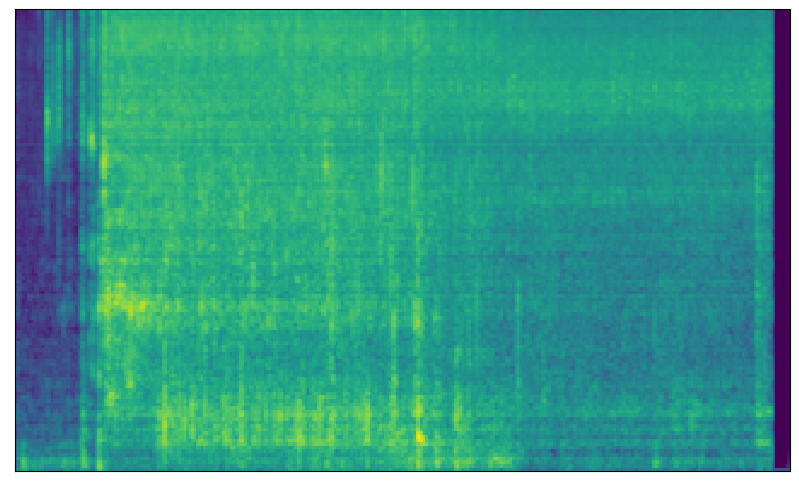

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 读取音频文件
audio_path = '/data4/xiongchenxu/tango/tango/outputs/1724438203_data4_xiongchenxu_tango_tango_pretrained_steps_200_guidance_3.0/Y_4SU3suJMvk+Water+tap+faucet.wav'
y, sr = librosa.load(audio_path, sr=None)  # sr=None 保持原始采样率

# 计算 Mel 频谱图
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# 将 Mel 频谱图转换为 dB 单位
S_db = librosa.power_to_db(S, ref=np.max)

# 显示 Mel 频谱图
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis=None, y_axis=None, cmap='viridis')  # 设置颜色映射为绿色的 'viridis'

# 保存图片
output_path = 'mel.png'
plt.show()


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 读取音频文件
audio_path = '/data4/xiongchenxu/tango/tango/reference_test_2s/Y_-fsiDpnxeE+Female+speech+woman+speaking.wav'
y, sr = librosa.load(audio_path, sr=None)  # sr=None 保持原始采样率

# 计算 Mel 频谱图
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# 将 Mel 频谱图转换为 dB 单位
S_db = librosa.power_to_db(S, ref=np.max)

# 显示 Mel 频谱图
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis=None, y_axis=None, cmap='viridis')  # 设置颜色映射为绿色的 'viridis'
plt.axis('off')  # 隐藏坐标轴

# 保存图片
output_path = 'mel.png'
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

# 关闭显示
plt.close()

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 读取音频文件
audio_path = '/data4/xiongchenxu/tango/tango/reference_test_2s/Y_-fsiDpnxeE+Female+speech+woman+speaking.wav'
y, sr = librosa.load(audio_path, sr=None)  # sr=None 保持原始采样率

# 计算 Mel 频谱图
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# 将 Mel 频谱图转换为 dB 单位
S_db = librosa.power_to_db(S, ref=np.max)

# 显示 Mel 频谱图
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis=None, y_axis=None, cmap='viridis')  # 设置颜色映射为绿色的 'viridis'
plt.axis('off')  # 隐藏坐标轴

# 保存图片
output_path = 'mel.png'
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

# 关闭显示
plt.close()

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 读取音频文件
audio_path = '/data4/xiongchenxu/tango/tango/reference_test_2s/Y_-fsiDpnxeE+Female+speech+woman+speaking.wav'
y, sr = librosa.load(audio_path, sr=None)  # sr=None 保持原始采样率

# 计算 Mel 频谱图
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# 将 Mel 频谱图转换为 dB 单位
S_db = librosa.power_to_db(S, ref=np.max)

# 显示 Mel 频谱图
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis=None, y_axis=None, cmap='viridis')  # 设置颜色映射为绿色的 'viridis'
plt.axis('off')  # 隐藏坐标轴

# 保存图片
output_path = 'mel.png'
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)

# 关闭显示
plt.close()

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_723626/2728933421.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


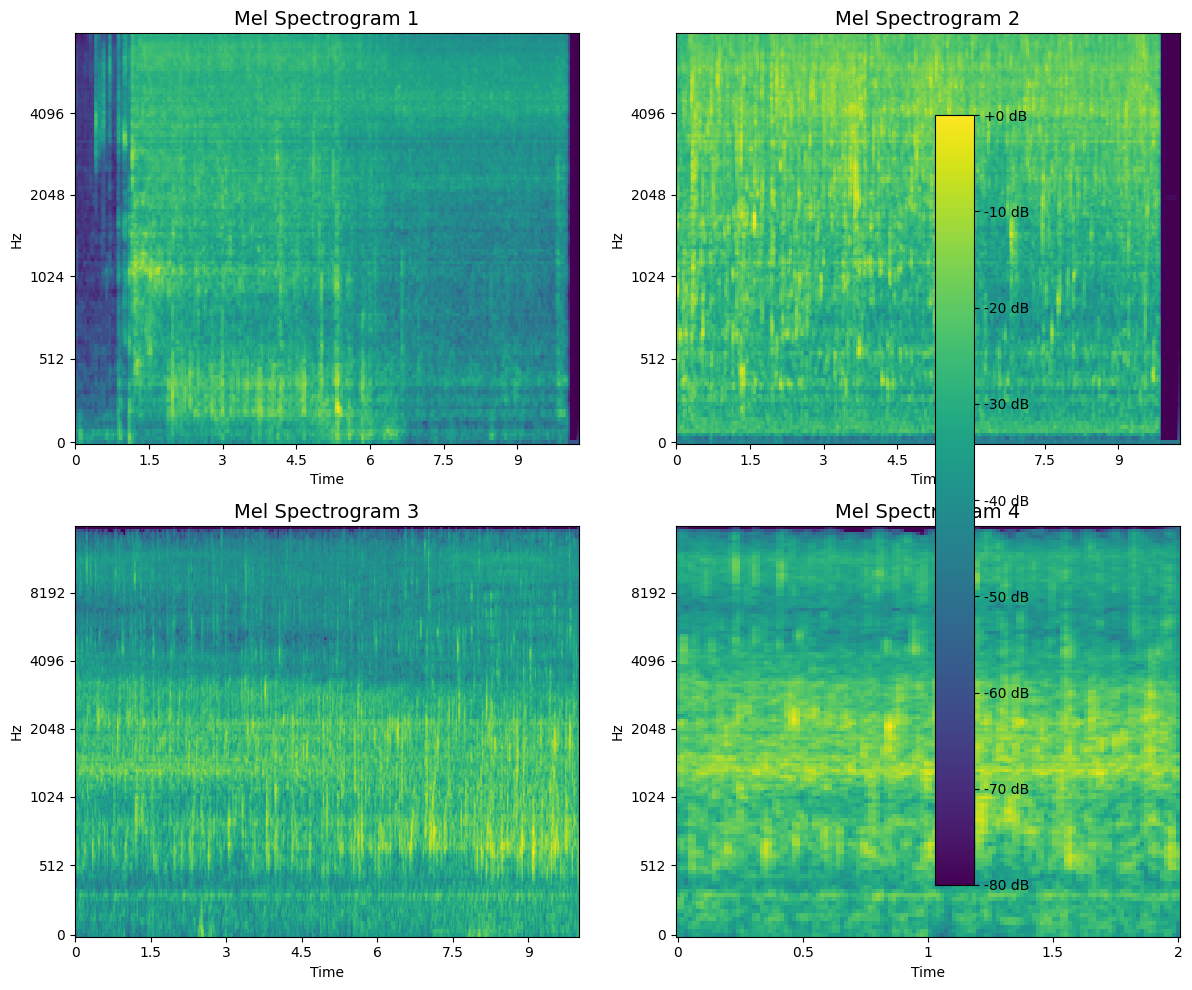

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 定义 4 个音频文件路径
audio_paths = [
    '/data4/xiongchenxu/tango/tango/outputs/1724438203_data4_xiongchenxu_tango_tango_pretrained_steps_200_guidance_3.0/Y_4SU3suJMvk+Water+tap+faucet.wav',
    '/data4/xiongchenxu/tango/tango/outputs/1725355131_data4_xiongchenxu_tango_tango_saved_1725195004_steps_200_guidance_3.0/Y_4SU3suJMvk+Water+tap+faucet.wav',
    '/data4/xiongchenxu/tango/tango/reference_test_2s/Y_4SU3suJMvk+Water+tap+faucet.wav'
]

# 创建一个 2x2 的图像布局
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 遍历音频路径并生成 Mel 频谱图
for i, audio_path in enumerate(audio_paths):
    # 读取音频文件
    y, sr = librosa.load(audio_path, sr=None)  # sr=None 保持原始采样率
    
    # 计算 Mel 频谱图
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    
    # 将 Mel 频谱图转换为 dB 单位
    S_db = librosa.power_to_db(S, ref=np.max)
    
    # 获取子图的坐标 (行, 列)
    ax = axes[i // 2, i % 2]
    
    # 绘制 Mel 频谱图，显示时间和 Mel 频率轴
    img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
    
    # 添加标题
    ax.set_title(f'Mel Spectrogram {i+1}', fontsize=14)

# 为每张子图添加颜色条
fig.colorbar(img, ax=axes, format='%+2.0f dB')

# 调整布局以避免重叠
plt.tight_layout()

# 显示图像
plt.show()

# 保存图片
output_path = 'mel_spectrogram_4_images.png'
fig.savefig(output_path)

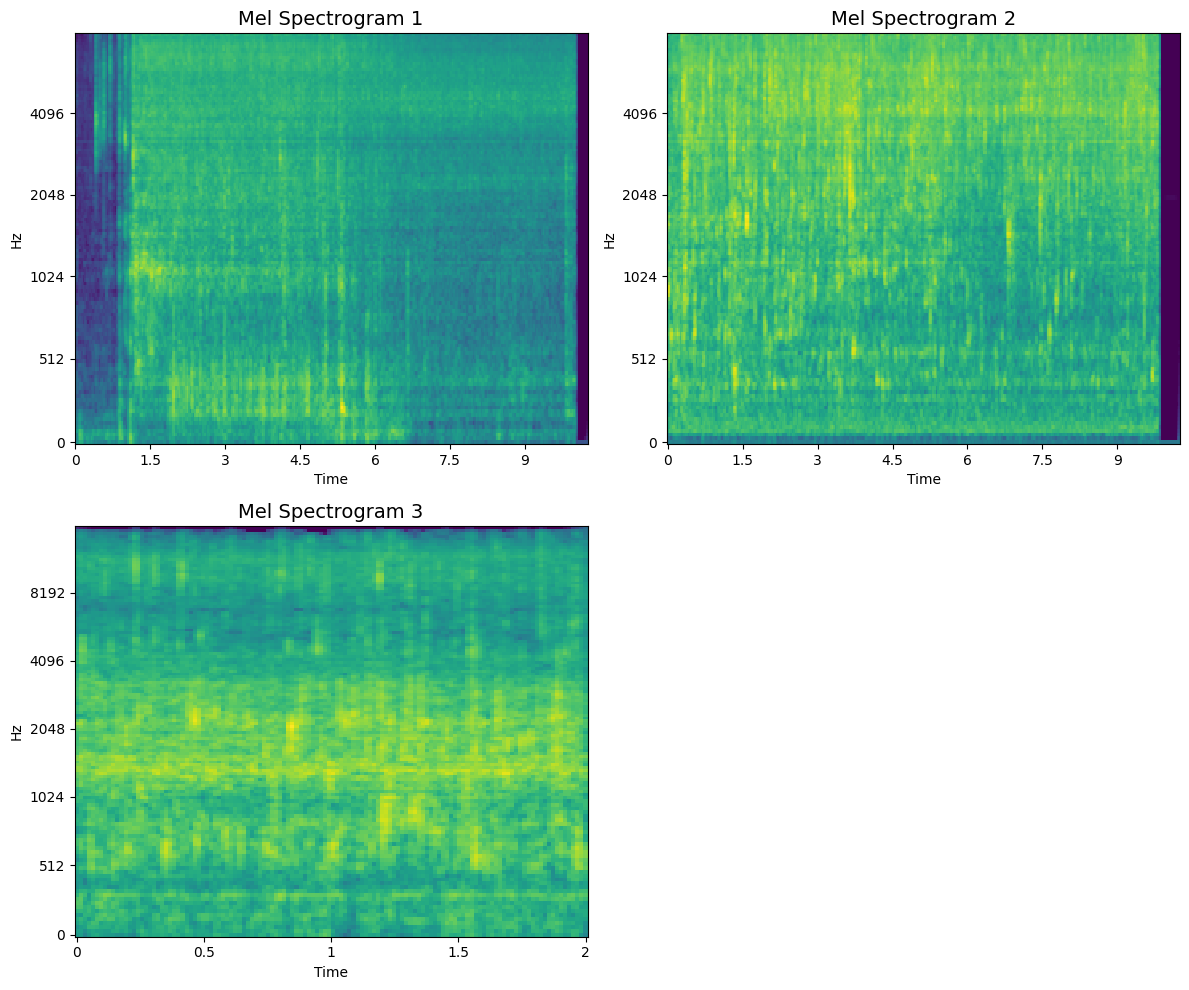

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 定义 3 个音频文件路径
audio_paths = [
    '/data4/xiongchenxu/tango/tango/outputs/1724438203_data4_xiongchenxu_tango_tango_pretrained_steps_200_guidance_3.0/Y_4SU3suJMvk+Water+tap+faucet.wav',
    '/data4/xiongchenxu/tango/tango/outputs/1725355131_data4_xiongchenxu_tango_tango_saved_1725195004_steps_200_guidance_3.0/Y_4SU3suJMvk+Water+tap+faucet.wav',
    '/data4/xiongchenxu/tango/tango/reference_test_2s/Y_4SU3suJMvk+Water+tap+faucet.wav'
]

# 创建一个 2x2 的图像布局（总共只有3张图，所以会有一个空位）
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 遍历音频路径并生成 Mel 频谱图
for i, audio_path in enumerate(audio_paths):
    # 读取音频文件
    y, sr = librosa.load(audio_path, sr=None)  # sr=None 保持原始采样率
    
    # 计算 Mel 频谱图
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    
    # 将 Mel 频谱图转换为 dB 单位
    S_db = librosa.power_to_db(S, ref=np.max)
    
    # 获取子图的坐标 (行, 列)
    ax = axes[i // 2, i % 2]
    
    # 绘制 Mel 频谱图，显示时间和 Mel 频率轴
    img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis', ax=ax)
    
    # 添加标题
    ax.set_title(f'Mel Spectrogram {i+1}', fontsize=14)

# 隐藏第四个子图（因为我们只有3张图）
axes[1, 1].axis('off')

# 调整布局以避免重叠
plt.tight_layout()

# 显示图像
plt.show()

# 保存图片
output_path = 'mel_spectrogram_3_images.png'
fig.savefig(output_path)